# Evaluating Multiple Models in an R Notebook

##  Introduction

The purpose of this example is to compare the performance of machine learning models within an R notebook. We will use the classic 1974 *Motor Trend* car road tests (`mtcars`) dataset to fit and evaluate three models:
1. A linear model using all variables
1. A linear model after variable selection
1. A Gradient Boosting Machine (GBM) model 

This is the R version of a [Python notebook](https://gallery.cortanaintelligence.com/Notebook/Evaluating-Multiple-Models-6) originally created by a Microsoft employee for distribution on the [Cortana Intelligence Gallery](https://gallery.cortanaintelligence.com/). A [lightly-modified version of the original Python notebook](https://notebooks.azure.com/library/eSJDgAFMXAY) is also available on Azure Notebooks.

## Outline

- [Introduction](#Introduction)
- [Prepare Data](#Prepare-Data)
- [Fit Models](#Fit-Models)
   - [Linear Model](#Linear-Model)
   - [Linear Model with Feature Selection](#Linear-Model-with-Feature-Selection)
   - [Gradient Boosting Machine Regression Model](#Gradient-Boosting-Machine-Regression-Model)
- [Conclusion](#Conclusion)

## Prepare Data

We'll start by loading the `mtcars` sample dataset:

In [1]:
data(mtcars)

There are eleven fields in this dataset:
1. `mpg`, the number of miles per gallon
1. `cyl`, the number of cylinders
1. `disp`, the engine displacement (volume swept by the cylinders) in cubic inches
1. `hp`, the gross horsepower
1. `drat`, the ratio of drive shaft rotations to rear axle rotations
1. `wt`, the car's weight in thousands of pounds
1. `qsec`, the fastest time in which the car can traverse 1/4 mile
1. `vs`, whether the car has a V engine or a straight engine
1. `am`, whether the car has an automatic or manual transmission
1. `gear`, number of forward gears
1. `carb`, number of carburetors

A summary of their distributions and the first few records are shown below:

In [2]:
summary(mtcars)
head(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


The goal for the machine learning models in this tutorial will be to predict each car's gas mileage (`mpg`) from the car's other features.

We will split the records into training and test datasets: each model will be fitted using the training data, and evaluated using the withheld test data.

In [3]:
set.seed(123)
train_indices <- sample(1:nrow(mtcars), size = round(nrow(mtcars) * 0.7))

train_df <- mtcars[train_indices, ]
test_df <- mtcars[-train_indices, ]

As you can see from the description above, the number of predictive features available in this dataset (10) is comparable to the number of records (22). Such conditions tend to produce overfitted models that give exceptional predictions on their own training data, but poor predictions on the withheld test data. We will see an example of an overfitted model below.

## Fit Models
### Linear Model
The following lines of code fit a linear model (without regularization) using all of the original features:

In [4]:
my_formula <- as.formula(paste(list(colnames(mtcars)[1], paste(colnames(mtcars)[2:11], collapse =' + ')), collapse=' ~ '))
print(my_formula)
fit <- lm(my_formula, data=train_df)
summary(fit)

mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb



Call:
lm(formula = my_formula, data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9346 -0.4617 -0.2668  0.3348  2.3890 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.292935  18.095137   1.011 0.333770    
cyl         -2.250788   0.783651  -2.872 0.015182 *  
disp         0.046079   0.013891   3.317 0.006865 ** 
hp          -0.008453   0.017144  -0.493 0.631679    
drat        -0.518802   0.991662  -0.523 0.611237    
wt          -8.728298   1.659312  -5.260 0.000268 ***
qsec         1.879357   0.868700   2.163 0.053386 .  
vs          -2.041868   1.706137  -1.197 0.256550    
am          -1.798748   1.528109  -1.177 0.263995    
gear         0.204367   1.027432   0.199 0.845962    
carb         1.298957   0.596785   2.177 0.052174 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.417 on 11 degrees of freedom
Multiple R-squared:  0.9627,	Adjusted R-squared:  0.9287 
F-statistic:

The fitted model summary shows a good fit to the training data, but only a few of the model features have strong significance. Let's apply this fitted model to the test dataset and evaluate the results:

In [5]:
# Create a summary stats function we'll apply for each model
summary_stats <- function(predicted, actual) {
    r_squared <- 1 - (sum((actual - predicted)^2) / sum((actual - mean(actual))^2))
    mae <- mean(abs(predicted - actual))
    rmse <- (mean((predicted - actual)^2))^0.5
    rae <- mean(abs(predicted - actual)) / mean(abs(actual - mean(actual)))
    rse <- mean((predicted - actual)^2) / mean((actual - mean(actual))^2) 
    return(c(r_squared, mae, rmse, rae, rse))
}

summary_df <- data.frame(list(summary_stats(predict(fit, newdata=test_df), test_df[['mpg']])))
colnames(summary_df) = c('Linear regression, all variables')
row.names(summary_df) <- c('R-Squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                           'Relative Absolute Error', 'Relative Squared Error')
summary_df

,"Linear regression, all variables"
R-Squared,0.5538858
Mean Absolute Error,4.4714163
Root Mean Squared Error,4.8573790
Relative Absolute Error,0.7514985
Relative Squared Error,0.4461142


Notice that the R-squared value for true vs. predicted `mpg` of the test set is much lower than it was for the training set. (Granted, our test set is not very large, so some fluctuation is expected.) This is indicative of model overfitting.

### Linear Model with Feature Selection

One way to reduce overfitting is to remove some predictive features from the model. Ideally we would be able to examine many or all possible subsets of features and select the subset of features that gives the best performance, but that is usually impractical due to the large number of possible subsets. A common alternative is to start from the full list of features and recursively remove one that seems to be contributing least to the model's performance (i.e., the feature whose removal has the least negative/most positive effect on model performance). This process is called recursive feature elimination (RFE).

RFE fits many models and compares their performance: it therefore requires both training and testing data. We would like to reserve the test dataset we created earlier to fairly compare all models, so RFE will need to set aside some records in the training dataset for its own round of testing. Fortunately, this is easily done using the `caret` package in R. This package will take a moment to install.

In [6]:
install.packages('caret')
library('caret')
library('plyr')

# split the features from the field to be predicted; normalize the features
x <- as.matrix(subset(train_df, select =-c(mpg)))
normalization <- preProcess(x)  # train the normalizer
x <- predict(normalization, x)  # apply the normalizer
x <- as.data.frame(x)
y <- train_df[['mpg']]

# perform the recursive feature elimination
set.seed(123)
ctrl <- rfeControl(functions = lmFuncs,
                   method = "repeatedcv",
                   repeats = 5)
lm_rfe_results <- rfe(x, y,
                      sizes = c(1:9),
                      metric = 'Rsquared',
                      rfeControl = rfeControl(functions = lmFuncs,
                                              method = "repeatedcv",
                                              repeats = 5))
lm_rfe_results

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
Loading required package: lattice
Loading required package: ggplot2



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables  RMSE Rsquared RMSESD RsquaredSD Selected
         1 2.338   0.9794 1.0266    0.06982         
         2 2.459   0.9827 0.8166    0.05646         
         3 1.734   0.9919 0.7955    0.02198        *
         4 1.655   0.9859 0.7039    0.05408         
         5 1.648   0.9877 0.7086    0.04859         
         6 1.801   0.9837 0.7851    0.08282         
         7 1.663   0.9840 0.9037    0.08634         
         8 1.807   0.9851 0.8324    0.08090         
         9 1.895   0.9853 0.8694    0.08015         
        10 1.891   0.9850 0.9078    0.08026         

The top 3 variables (out of 3):
   wt, disp, cyl


We've used the R-squared value as our metric for model quality. The R-squared value is maximized when the model contains three features (this maximum is more easily identified in the plot below):

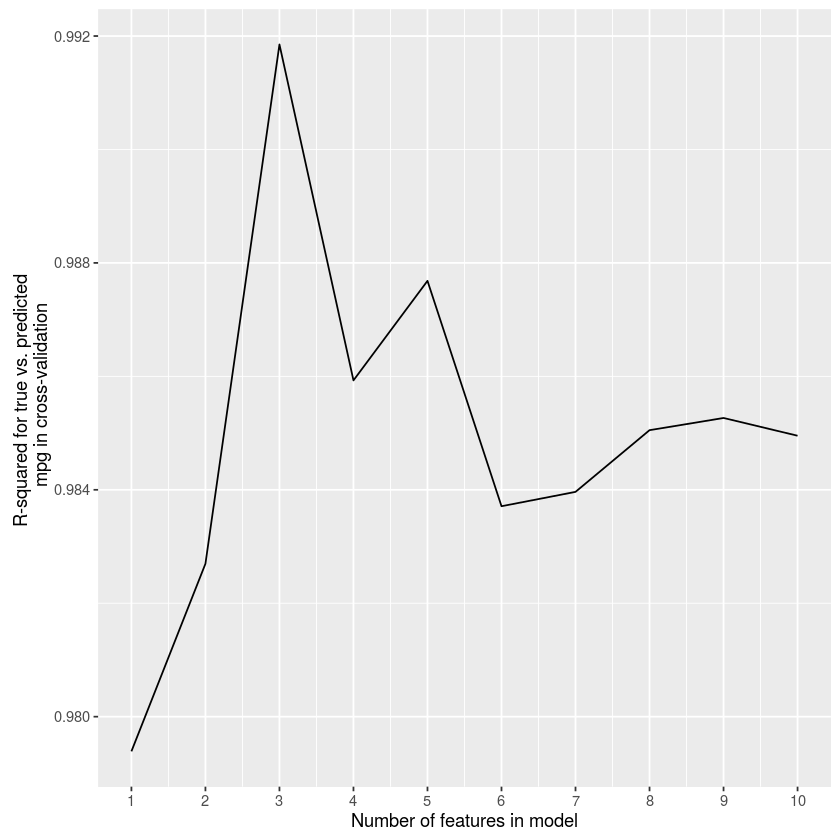

In [7]:
library(ggplot2)

plot_df = data.frame(list(Features = lm_rfe_results$results$Variables,
                          Rsquared = lm_rfe_results$results$Rsquared))
ggplot(plot_df, aes(x=Features, y=Rsquared)) + geom_line() +
    ylab('R-squared for true vs. predicted \n mpg in cross-validation') +
    scale_x_continuous(name = 'Number of features in model',
                       breaks=1:10)

Because the cross-validation dataset size is so small in this example, the maximum at three features may be due to random fluctuations. However, it does appear that including an intermediate number of features gives a better model in general.

We'll fit a linear model that uses only those three features:

In [8]:
my_formula_short <- as.formula(paste(list(colnames(mtcars)[1],
                                          paste(lm_rfe_results$optVariables, collapse =' + ')),
                                     collapse=' ~ '))
print(my_formula_short)
fit2 <- lm(my_formula_short, data=train_df)
summary(fit2)

mpg ~ wt + disp + cyl



Call:
lm(formula = my_formula_short, data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0278 -0.9406 -0.1110  1.0166  2.8959 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.54012    2.18825  19.440 1.57e-13 ***
wt          -4.24770    0.79958  -5.312 4.75e-05 ***
disp         0.01711    0.00882   1.940 0.068188 .  
cyl         -2.09360    0.49482  -4.231 0.000502 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.685 on 18 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8992 
F-statistic: 63.45 on 3 and 18 DF,  p-value: 9.075e-10


...and evaluate its performance on the test set:

In [9]:
summary_df['Linear regression, selected variables'] <- summary_stats(predict(fit2, test_df), test_df[['mpg']])
summary_df

,"Linear regression, all variables","Linear regression, selected variables"
R-Squared,0.5538858,0.7285314
Mean Absolute Error,4.4714163,3.2496889
Root Mean Squared Error,4.8573790,3.7891239
Relative Absolute Error,0.7514985,0.5461662
Relative Squared Error,0.4461142,0.2714686


The model's performance on the withheld test set improved (by all metrics) after the majority of the features were removed.

### Gradient Boosting Machine Regression Model

Before fitting the gradient boosting model, we need to estimate some parameters and we'll do this using cross-validation along with grid search. First, we install the necessary package for the gradient boosting machine models:

In [10]:
install.packages('gbm')
library('gbm')

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1


We set the combinations of parameters to try using the `caret` package function `expand.grid()`, and our cross-validation settings using `trainControl`. We train the gradient boosting machine model using these parameters and the `caret` package function `train()`. This code box may take some time to run because it tries $2^4=16$ parameter combinations and runs through multiple cross-validation rounds.

In [11]:
gbmGrid <-  expand.grid(shrinkage = c(0.01, 0.001),
                        interaction.depth = c(2, 4),
                        n.trees = c(5000, 10000),
                        n.minobsinnode = c(1, 2))
fitControl <- trainControl(method = "repeatedcv",
                           number = 5,
                           repeats = 5)
fit3 <- train(my_formula,
              data = train_df,                
              method = "gbm",
              trControl = fitControl,
              tuneGrid = gbmGrid,
              verbose = FALSE,
              metric = 'Rsquared')
fit3

Stochastic Gradient Boosting 

22 samples
10 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 18, 17, 18, 18, 17, 19, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  RMSE      Rsquared 
  0.001      2                  1                5000    2.307984  0.8329262
  0.001      2                  1               10000    2.339601  0.8246189
  0.001      2                  2                5000    2.428278  0.8369266
  0.001      2                  2               10000    2.525441  0.8207452
  0.001      4                  1                5000    2.379316  0.8287314
  0.001      4                  1               10000    2.384524  0.8238857
  0.001      4                  2                5000    2.414396  0.8392163
  0.001      4                  2               10000    2.503651  0.8259388
  0.010      2                  1                5000    2.334600  0.8202073

We can now use the model fitted with the optimal parameter combination to predict the gas mileage for test set records:

In [12]:
summary_df['Gradient boosting machine regression'] <- summary_stats(predict(fit3, newdata=test_df), test_df[['mpg']])
summary_df

,"Linear regression, all variables","Linear regression, selected variables",Gradient boosting machine regression
R-Squared,0.5538858,0.7285314,0.8295276
Mean Absolute Error,4.4714163,3.2496889,2.3240431
Root Mean Squared Error,4.8573790,3.7891239,3.0026594
Relative Absolute Error,0.7514985,0.5461662,0.3905955
Relative Squared Error,0.4461142,0.2714686,0.1704724


Looks like our gradient boosting machine model did quite well! The plot below shows the importance of each feature:

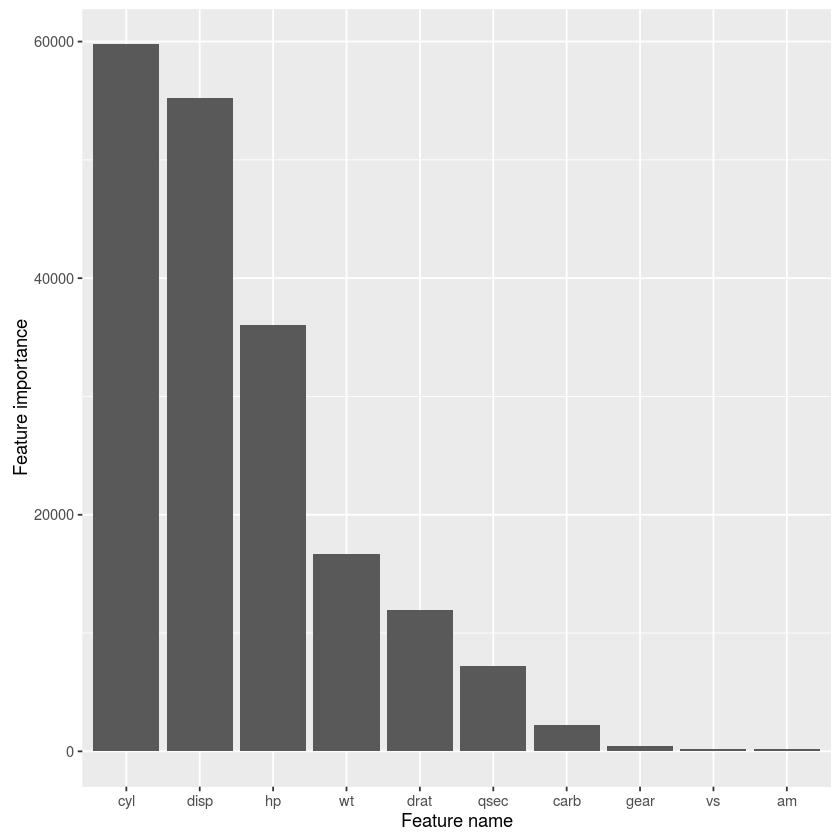

In [13]:
# get feature importance information
feature_importance <- varImp(fit3, scale = FALSE)
plot_df <- data.frame(list(name = row.names(feature_importance$importance),
                           importance = feature_importance$importance$Overall))

# plot the feature importances in descending order
plot_df <- plot_df[with(plot_df, order(-importance)), ]
plot_df$name <- factor(plot_df$name, levels=plot_df$name)
ggplot(plot_df, aes(x=name, y=importance)) + geom_bar(stat='identity') +
    xlab('Feature name') + ylab('Feature importance')

Notice that the features retained after recursive feature elimination have relatively high feature importance in GBM as well.

Let's assess whether our GBM model's performance is likely to be limited by the number of estimators used:

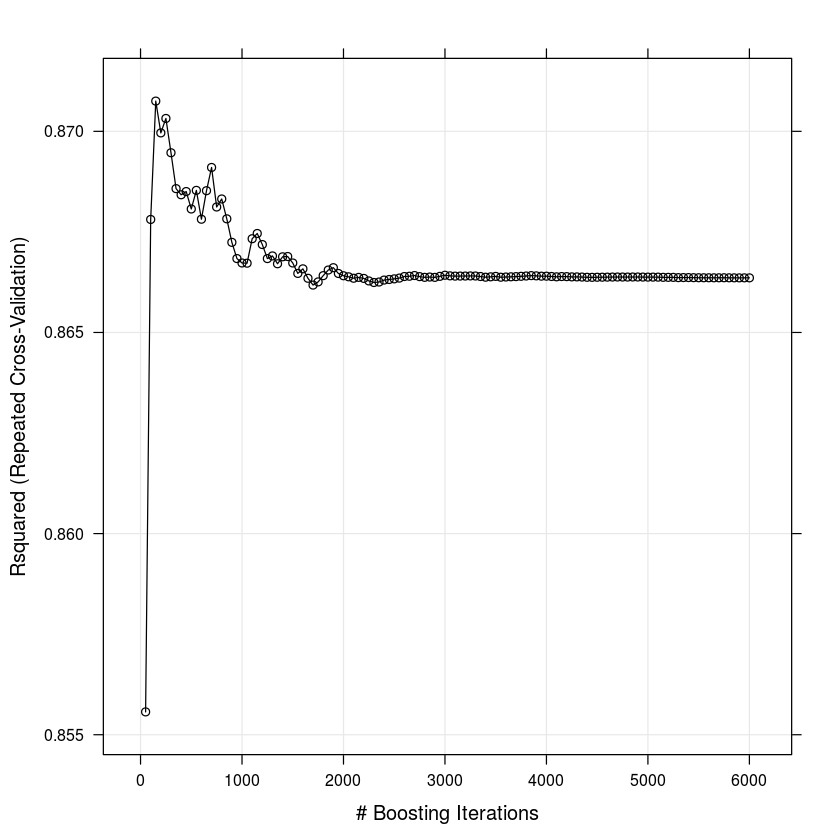

In [14]:
gbmGrid <-  expand.grid(shrinkage = 0.01,
                        interaction.depth = 2,
                        n.trees = 50 * 1:120,
                        n.minobsinnode = 1)
fit3_trees <- train(my_formula,
                   data = train_df,                
                   method = "gbm",
                   trControl = fitControl,
                   tuneGrid = gbmGrid,
                   verbose = FALSE,
                   metric = 'Rsquared')
trellis.par.set(caretTheme())
plot(fit3_trees)

The quality of the model plateaus after around 2000 iterations, suggesting that model quality would not improve substantially if the number of trees were increased.

## Conclusion
The following table compares the performance of the three models. Variable selection using RFE improved the performance of the linear regression model by all metrics. The GBM model performed better still on all metrics, though some differences are small relative to the random fluctuations we might expect with a dataset of this size.

In [15]:
summary_df

,"Linear regression, all variables","Linear regression, selected variables",Gradient boosting machine regression
R-Squared,0.5538858,0.7285314,0.8295276
Mean Absolute Error,4.4714163,3.2496889,2.3240431
Root Mean Squared Error,4.8573790,3.7891239,3.0026594
Relative Absolute Error,0.7514985,0.5461662,0.3905955
Relative Squared Error,0.4461142,0.2714686,0.1704724
